In [28]:
import pandas as pd
import numpy as np

**Results based on last touch attribution modeling**

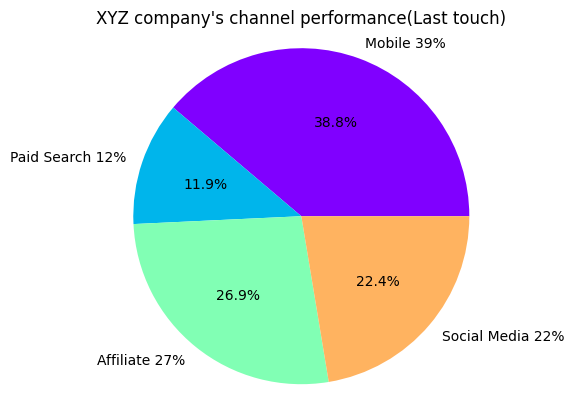

In [29]:
import matplotlib.pyplot as plt

# Define the data
mobile_p = 26/67
paid_search_p = 8/67
affiliate_p = 18/67
social_media_p = 15/67

# Ingredients for the pie chart
slices_actual = [mobile_p, paid_search_p, affiliate_p, social_media_p]
labels = ["Mobile", "Paid Search", "Affiliate", "Social Media"]
percentages = [round(p * 100) for p in slices_actual]

# Add percentages to labels
labels_with_percentages = [f"{label} {percentage}%" for label, percentage in zip(labels, percentages)]

# Create the pie chart with custom colors
plt.pie(slices_actual, labels=labels_with_percentages, autopct='%1.1f%%', colors=plt.cm.rainbow([i / len(labels) for i in range(len(labels))]))
plt.title("XYZ company's channel performance(Last touch)")

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [30]:
data=pd.read_csv('../Session 4 RMD Attribution Modeling/Data/knc_attribution.csv')

In [31]:
data.head()

,users_id,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,channel9,...,channel38,channel39,channel40,channel41,channel42,channel43,channel44,channel45,user_purchase,null_purchase
0,1,mobile,paid_search,paid_search,paid_search,affiliate,mobile,paid_search,paid_search,social_media,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,2,paid_search,mobile,mobile,paid_search,affiliate,paid_search,mobile,paid_search,mobile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,3,social_media,social_media,mobile,affiliate,social_media,paid_search,mobile,mobile,affiliate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,4,mobile,affiliate,mobile,social_media,affiliate,mobile,social_media,mobile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,5,paid_search,paid_search,affiliate,paid_search,mobile,paid_search,paid_search,affiliate,mobile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [32]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame
data_temp = {
    "Variable": ["users_id", "channeln", "user_purchase", "null_purchase"],
    "Description": [
        "Unique user ID",
        "Online advertising (i.e., mobile, paid search, affiliate, and social media) exposure path, with channel1 referring to the first exposure, channel2 the second, ..., channeln the nth (maximum number of exposure = 45).",
        "Consumer final conversion indicator, which takes value of 1 if a specific consumer made a purchase (i.e., converted) at the end of her path, and 0 otherwise.",
        "The opposite of 'user_purchase', taking value of 1 if there is no purchase and 0 otherwise.",
    ]
}

var_desc = pd.DataFrame(data_temp)

# Print the table
print(tabulate(var_desc, headers="keys", tablefmt="grid"))


+----+---------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | Variable      | Description                                                                                                                                                                                                             |
+====+===============+=========================================================================================================================================================================================================================+
|  0 | users_id      | Unique user ID                                                                                                                                                                                                          |
+----+---------------+--------------

**Markov chain approach - Data preparation phase**

In [33]:
for id,temp in data.iloc[:,1:len(data.columns)-2].iterrows():
    my_list = [str(item) for item in temp.values if not pd.isna(item)]
    #print(id)
    print(my_list)
    data.loc[id,'path']=">".join(my_list)
    

['mobile', 'paid_search', 'paid_search', 'paid_search', 'affiliate', 'mobile', 'paid_search', 'paid_search', 'social_media', 'mobile', 'social_media', 'paid_search', 'social_media', 'mobile', 'affiliate', 'paid_search', 'paid_search']
['paid_search', 'mobile', 'mobile', 'paid_search', 'affiliate', 'paid_search', 'mobile', 'paid_search', 'mobile', 'mobile', 'paid_search', 'affiliate', 'affiliate', 'affiliate', 'affiliate', 'paid_search', 'affiliate', 'affiliate', 'affiliate', 'affiliate', 'affiliate', 'paid_search', 'affiliate']
['social_media', 'social_media', 'mobile', 'affiliate', 'social_media', 'paid_search', 'mobile', 'mobile', 'affiliate']
['mobile', 'affiliate', 'mobile', 'social_media', 'affiliate', 'mobile', 'social_media', 'mobile']
['paid_search', 'paid_search', 'affiliate', 'paid_search', 'mobile', 'paid_search', 'paid_search', 'affiliate', 'mobile', 'affiliate', 'paid_search', 'affiliate', 'affiliate', 'affiliate', 'affiliate', 'paid_search', 'mobile', 'affiliate', 'paid_s

In [34]:
data.head()

,users_id,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,channel9,...,channel39,channel40,channel41,channel42,channel43,channel44,channel45,user_purchase,null_purchase,path
0,1,mobile,paid_search,paid_search,paid_search,affiliate,mobile,paid_search,paid_search,social_media,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,mobile>paid_search>paid_search>paid_search>aff...
1,2,paid_search,mobile,mobile,paid_search,affiliate,paid_search,mobile,paid_search,mobile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,paid_search>mobile>mobile>paid_search>affiliat...
2,3,social_media,social_media,mobile,affiliate,social_media,paid_search,mobile,mobile,affiliate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,social_media>social_media>mobile>affiliate>soc...
3,4,mobile,affiliate,mobile,social_media,affiliate,mobile,social_media,mobile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,mobile>affiliate>mobile>social_media>affiliate...
4,5,paid_search,paid_search,affiliate,paid_search,mobile,paid_search,paid_search,affiliate,mobile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,paid_search>paid_search>affiliate>paid_search>...


In [35]:
import regex 
data['path'] = data['path'].str.replace(r'\s.*', '', regex=True)
data['cleaned_path'] = data['path'].str.replace(r'\W$', '', regex=True)

In [36]:
data.head()

,users_id,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,channel9,...,channel40,channel41,channel42,channel43,channel44,channel45,user_purchase,null_purchase,path,cleaned_path
0,1,mobile,paid_search,paid_search,paid_search,affiliate,mobile,paid_search,paid_search,social_media,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,mobile>paid_search>paid_search>paid_search>aff...,mobile>paid_search>paid_search>paid_search>aff...
1,2,paid_search,mobile,mobile,paid_search,affiliate,paid_search,mobile,paid_search,mobile,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,paid_search>mobile>mobile>paid_search>affiliat...,paid_search>mobile>mobile>paid_search>affiliat...
2,3,social_media,social_media,mobile,affiliate,social_media,paid_search,mobile,mobile,affiliate,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,social_media>social_media>mobile>affiliate>soc...,social_media>social_media>mobile>affiliate>soc...
3,4,mobile,affiliate,mobile,social_media,affiliate,mobile,social_media,mobile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,mobile>affiliate>mobile>social_media>affiliate...,mobile>affiliate>mobile>social_media>affiliate...
4,5,paid_search,paid_search,affiliate,paid_search,mobile,paid_search,paid_search,affiliate,mobile,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,paid_search>paid_search>affiliate>paid_search>...,paid_search>paid_search>affiliate>paid_search>...


In [37]:
data['path'][0]

'mobile>paid_search>paid_search>paid_search>affiliate>mobile>paid_search>paid_search>social_media>mobile>social_media>paid_search>social_media>mobile>affiliate>paid_search>paid_search'

In [38]:
from sklearn.model_selection import train_test_split

data_train,data_test=train_test_split(data,test_size=0.2)

In [39]:
data_train.shape

(84, 50)

In [40]:
data_test.shape

(21, 50)

In [41]:
84+21

105

In [42]:
data.columns

Index(['users_id', 'channel1', 'channel2', 'channel3', 'channel4', 'channel5',
       'channel6', 'channel7', 'channel8', 'channel9', 'channel10',
       'channel11', 'channel12', 'channel13', 'channel14', 'channel15',
       'channel16', 'channel17', 'channel18', 'channel19', 'channel20',
       'channel21', 'channel22', 'channel23', 'channel24', 'channel25',
       'channel26', 'channel27', 'channel28', 'channel29', 'channel30',
       'channel31', 'channel32', 'channel33', 'channel34', 'channel35',
       'channel36', 'channel37', 'channel38', 'channel39', 'channel40',
       'channel41', 'channel42', 'channel43', 'channel44', 'channel45',
       'user_purchase', 'null_purchase', 'path', 'cleaned_path'],
      dtype='object')

In [43]:
grouped_data=data_train.groupby('cleaned_path').sum().reset_index()

In [44]:
grouped_data.columns

Index(['cleaned_path', 'users_id', 'user_purchase', 'null_purchase'], dtype='object')

In [45]:
grouped_data.drop('users_id',axis=1,inplace=True)

In [46]:
grouped_data.columns

Index(['cleaned_path', 'user_purchase', 'null_purchase'], dtype='object')

**Markov chain modeling**

In [47]:
grouped_data.head()

,cleaned_path,user_purchase,null_purchase
0,affiliate>mobile>affiliate>social_media>social...,1,0
1,affiliate>paid_search>affiliate>paid_search>af...,1,0
2,affiliate>paid_search>affiliate>paid_search>mo...,1,0
3,affiliate>paid_search>affiliate>paid_search>so...,1,0
4,affiliate>paid_search>affiliate>paid_search>so...,4,0


In [48]:
#pip install --upgrade setuptools

In [49]:
#pip install Cython

In [50]:
#pip install ChannelAttribution

In [51]:
import ChannelAttribution

*** Looking to run more advanced attribution? Try ChannelAttribution Pro for free! Visit https://channelattribution.io/product
Version: 2.1.4


**Testing the package using sample data**

In [52]:
test=pd.read_csv('https://channelattribution.io/csv/Data.csv',sep=";")

In [53]:
test.head()

,path,total_conversions,total_conversion_value,total_null
0,eta > iota > alpha > eta,1,0.244,3
1,iota > iota > iota > iota,2,3.195,6
2,alpha > iota > alpha > alpha > alpha > iota > ...,2,6.754,6
3,beta > eta,1,2.402,3
4,iota > eta > theta > lambda > lambda > theta >...,0,0.000,2


In [54]:
markov_test=ChannelAttribution.auto_markov_model(Data=test,var_path='path',var_conv='total_conversions',var_null='total_null',plot=True)

Suggested order: 4
Number of simulations: 100000 - Convergence reached: 3.19% < 5.00%
Percentage of simulated paths that successfully end before maximum number of steps (67) is reached: 99.99%
*** Looking to run more advanced attribution? Try ChannelAttribution Pro for free! Visit https://channelattribution.io/product


**Trying on our actual grouped dataset**

In [55]:
grouped_data.head()

,cleaned_path,user_purchase,null_purchase
0,affiliate>mobile>affiliate>social_media>social...,1,0
1,affiliate>paid_search>affiliate>paid_search>af...,1,0
2,affiliate>paid_search>affiliate>paid_search>mo...,1,0
3,affiliate>paid_search>affiliate>paid_search>so...,1,0
4,affiliate>paid_search>affiliate>paid_search>so...,4,0


In [56]:
markov=ChannelAttribution.markov_model(Data=grouped_data,var_path='cleaned_path',var_conv='user_purchase',var_null='null_purchase',order=3)

Number of simulations: 100000 - Convergence reached: 0.44% < 5.00%
Percentage of simulated paths that successfully end before maximum number of steps (44) is reached: 91.63%
*** Looking to run more advanced attribution? Try ChannelAttribution Pro for free! Visit https://channelattribution.io/product


In [57]:
markov

,channel_name,total_conversions
0,affiliate,16.310601
1,mobile,17.404438
2,social_media,15.880524
3,paid_search,17.404438


In [58]:
markov_df=pd.DataFrame({'channel':markov['channel_name'],'total_conversions':round(markov['total_conversions']),'percent':round((markov['total_conversions']/sum(data_train['user_purchase'])),3)})

In [80]:
markov_df.sort_values(by='percent',ascending=False)

,channel,total_conversions,percent
1,mobile,17.0,0.260
3,paid_search,17.0,0.260
0,affiliate,16.0,0.243
2,social_media,16.0,0.237


In [60]:
markov

,channel_name,total_conversions
0,affiliate,16.310601
1,mobile,17.404438
2,social_media,15.880524
3,paid_search,17.404438


In [61]:
markov_transition=ChannelAttribution.transition_matrix(Data=grouped_data,var_path='cleaned_path',var_conv='user_purchase',var_null='null_purchase',order=3)

*** Looking to run more advanced attribution? Try ChannelAttribution Pro for free! Visit https://channelattribution.io/product


In [62]:
markov_transition['channels']

,id_channel,channel_name
0,1,affiliate
1,2,mobile
2,3,social_media
3,4,paid_search


In [63]:
markov_transition['transition_matrix']

,channel_from,channel_to,transition_probability
0,(start),1 2 1,0.011905
1,(start),1 4 1,0.142857
2,(start),1 4 4,0.059524
3,(start),2 1 2,0.023810
4,(start),2 2 1,0.011905
...,...,...,...
246,4 3 4,3 4 4,0.357143
247,4 3 4,3 4 2,0.285714
248,3 4 4,4 4 2,1.000000
249,1 1 3,1 3 4,1.000000


In [81]:
markov_transition_first_order=ChannelAttribution.transition_matrix(Data=grouped_data,var_path='cleaned_path',var_conv='user_purchase',var_null='null_purchase',order=1)

*** Looking to run more advanced attribution? Try ChannelAttribution Pro for free! Visit https://channelattribution.io/product


In [111]:
markov_transition_first_order['channels']

,id_channel,channel_name
0,1,affiliate
1,2,mobile
2,3,social_media
3,4,paid_search


In [82]:
trans_matrix=markov_transition_first_order['transition_matrix']

In [83]:
df_dummy=pd.DataFrame({'channel_from':['(start)','(conversion)','(null)'],'channel_to':['(start)','(conversion)','(null)'],trans_matrix.columns.values[2]:[0,1,1]})

In [84]:
df_dummy

,channel_from,channel_to,transition_probability
0,(start),(start),0
1,(conversion),(conversion),1
2,(null),(null),1


In [125]:
trans_matrix

,channel_from,channel_to,transition_probability
0,(start),1,0.214286
1,(start),2,0.285714
2,(start),4,0.380952
3,(start),3,0.119048
4,1,2,0.200521
5,1,3,0.192708
6,1,4,0.361979
7,1,1,0.184896
8,1,(conversion),0.046875
9,1,(null),0.013021


In [145]:
trans_matrix_1st=pd.concat([df_dummy,trans_matrix],axis=0)

In [146]:
trans_matrix_1st

,channel_from,channel_to,transition_probability
0,(start),(start),0.000000
1,(conversion),(conversion),1.000000
2,(null),(null),1.000000
0,(start),1,0.214286
1,(start),2,0.285714
2,(start),4,0.380952
3,(start),3,0.119048
4,1,2,0.200521
5,1,3,0.192708
6,1,4,0.361979


In [147]:
"',".join([i for i in markov_transition_first_order['channels']['channel_name']])

"affiliate',mobile',social_media',paid_search"

In [148]:
markov_transition_first_order['channels']

,id_channel,channel_name
0,1,affiliate
1,2,mobile
2,3,social_media
3,4,paid_search


In [149]:
levels = ['(start)', '(conversion)', '(null)', '1', '2', '3', '4']

# Factorize the 'channel_from' and 'channel_to' columns
trans_matrix_1st['channel_from'] = pd.Categorical(trans_matrix_1st['channel_from'], categories=levels)
trans_matrix_1st['channel_to'] = pd.Categorical(trans_matrix_1st['channel_to'], categories=levels)

# Perform the equivalent of dcast in R
trans_matrix_1st = pd.pivot_table(trans_matrix_1st, index='channel_from', columns='channel_to', values='transition_probability', aggfunc='first')

# Replace NaN values with 0
trans_matrix_1st = trans_matrix_1st.fillna(0)



In [150]:
trans_matrix_1st

channel_to,(start),(conversion),(null),1,2,3,4
channel_from,,,,,,,
(start),0.0,0.000000,0.000000,0.214286,0.285714,0.119048,0.380952
(conversion),0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(null),0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.046875,0.013021,0.184896,0.200521,0.192708,0.361979
2,0.0,0.055215,0.004090,0.208589,0.257669,0.145194,0.329243
3,0.0,0.013624,0.005450,0.231608,0.386921,0.215259,0.147139
4,0.0,0.034274,0.016129,0.217742,0.241935,0.268145,0.221774


In [151]:
trans_matrix_1st.index = trans_matrix_1st.index.map({
    '1': 'affiliate',
    '2': 'mobile',
    '3': 'social_media',
    '4': 'paid_search',
    '(start)': '(start)',
    '(conversion)': '(conversion)',
    '(null)': '(null)'
})

trans_matrix_1st.columns = trans_matrix_1st.columns.map({
    '1': 'affiliate',
    '2': 'mobile',
    '3': 'social_media',
    '4': 'paid_search',
    '(start)': '(start)',
    '(conversion)': '(conversion)',
    '(null)': '(null)'
})

In [152]:
trans_matrix_1st

channel_to,(start),(conversion),(null),affiliate,mobile,social_media,paid_search
channel_from,,,,,,,
(start),0.0,0.000000,0.000000,0.214286,0.285714,0.119048,0.380952
(conversion),0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(null),0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
affiliate,0.0,0.046875,0.013021,0.184896,0.200521,0.192708,0.361979
mobile,0.0,0.055215,0.004090,0.208589,0.257669,0.145194,0.329243
social_media,0.0,0.013624,0.005450,0.231608,0.386921,0.215259,0.147139
paid_search,0.0,0.034274,0.016129,0.217742,0.241935,0.268145,0.221774


In [104]:
trans_matrix1=trans_matrix_1st.to_numpy()

In [105]:
trans_matrix1

array([[0.        , 0.        , 0.        , 0.21428571, 0.28571429,
        0.11904762, 0.38095238],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.046875  , 0.01302083, 0.18489583, 0.20052083,
        0.19270833, 0.36197917],
       [0.        , 0.05521472, 0.00408998, 0.20858896, 0.25766871,
        0.14519427, 0.32924335],
       [0.        , 0.01362398, 0.00544959, 0.23160763, 0.38692098,
        0.21525886, 0.14713896],
       [0.        , 0.03427419, 0.01612903, 0.21774194, 0.24193548,
        0.26814516, 0.22177419]])

In [106]:
import networkx as nx
import matplotlib.pyplot as plt

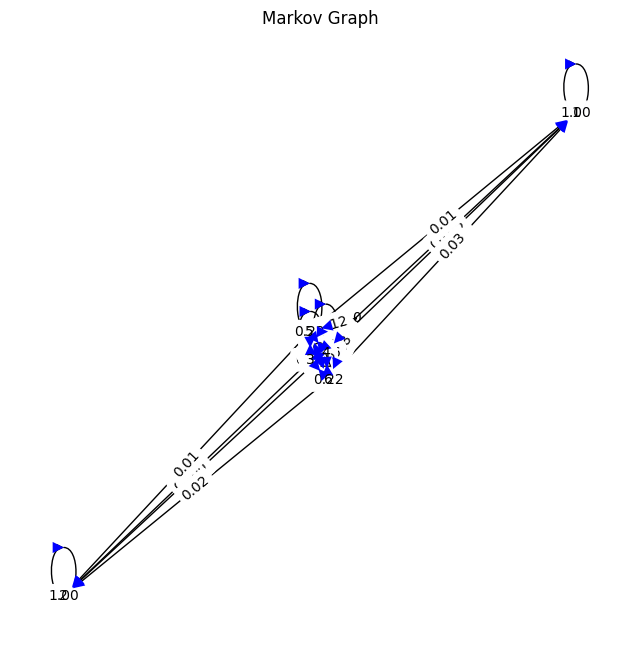

In [107]:
# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add nodes to the graph
for i in range(len(trans_matrix1)):
    G.add_node(str(i))

# Add edges to the graph with labels for transition probabilities
for i in range(len(trans_matrix1)):
    for j in range(len(trans_matrix1[i])):
        if trans_matrix1[i][j] > 0:
            G.add_edge(str(i), str(j), label=f'{trans_matrix1[i][j]:.2f}')

# Create a plot with arrow sizes and labels
edge_labels = {(i, j): label for (i, j, label) in G.edges(data='label')}
edge_arrow_sizes = [0.01 * trans_matrix1[int(i)][int(j)] for (i, j) in G.edges()]

pos = nx.spring_layout(G, seed=42)  # Adjust layout as needed

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=0, node_color="yellow", font_size=10, node_shape="o", ax=ax)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
nx.draw_networkx_edges(G, pos, width=edge_arrow_sizes, edge_color="blue", arrowsize=20, ax=ax)

plt.title("Markov Graph")
plt.show()

**Transistion matrix heatmap**

In [108]:
trans_matrix1

array([[0.        , 0.        , 0.        , 0.21428571, 0.28571429,
        0.11904762, 0.38095238],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.046875  , 0.01302083, 0.18489583, 0.20052083,
        0.19270833, 0.36197917],
       [0.        , 0.05521472, 0.00408998, 0.20858896, 0.25766871,
        0.14519427, 0.32924335],
       [0.        , 0.01362398, 0.00544959, 0.23160763, 0.38692098,
        0.21525886, 0.14713896],
       [0.        , 0.03427419, 0.01612903, 0.21774194, 0.24193548,
        0.26814516, 0.22177419]])

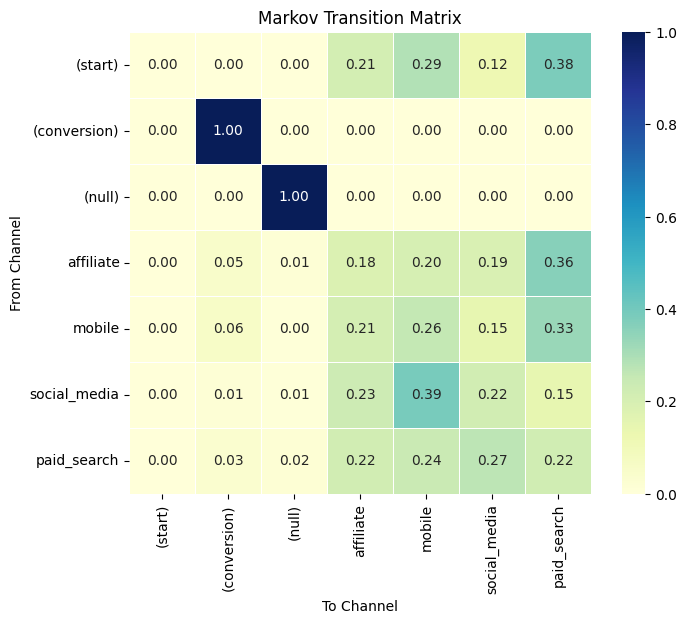

In [153]:
#importing seaborn library
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(trans_matrix_1st, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, square=True)

plt.title("Markov Transition Matrix")
plt.xlabel("To Channel")
plt.ylabel("From Channel")
plt.show()

**Model comparison**

In [156]:
grouped_data.head()

,cleaned_path,user_purchase,null_purchase
0,affiliate>mobile>affiliate>social_media>social...,1,0
1,affiliate>paid_search>affiliate>paid_search>af...,1,0
2,affiliate>paid_search>affiliate>paid_search>mo...,1,0
3,affiliate>paid_search>affiliate>paid_search>so...,1,0
4,affiliate>paid_search>affiliate>paid_search>so...,4,0


In [159]:
heuristic=ChannelAttribution.heuristic_models(grouped_data,'cleaned_path','user_purchase','null_purchase',sep='>')

*** Looking to run more advanced attribution? Try ChannelAttribution Pro for free! Visit https://channelattribution.io/product


In [160]:
heuristic

,channel_name,first_touch_conversions,first_touch_value,last_touch_conversions,last_touch_value,linear_touch_conversions,linear_touch_value
0,affiliate,14.0,4.0,18.0,5.0,15.039077,3.349143
1,mobile,18.0,6.0,27.0,2.0,18.685378,4.214630
2,social_media,7.0,3.0,5.0,2.0,14.268825,4.225438
3,paid_search,28.0,4.0,17.0,8.0,19.006719,5.210790


**Summarize results of all 3 into one table**

In [173]:
first_touch_percentage=round((heuristic['first_touch_conversions']/sum(data_train['user_purchase'])),3)

In [174]:
last_touch_percentage=round((heuristic['last_touch_conversions']/sum(data_train['user_purchase'])),3)

In [175]:
last_touch_percentage

0    0.269
1    0.403
2    0.075
3    0.254
Name: last_touch_conversions, dtype: float64

In [176]:
first_touch_percentage

0    0.209
1    0.269
2    0.104
3    0.418
Name: first_touch_conversions, dtype: float64

In [ ]:
markov_df=pd.DataFrame({'channel':markov['channel_name'],'total_conversions':round(markov['total_conversions']),'percent':round((markov['total_conversions']/sum(data_train['user_purchase'])),3)})

In [171]:
markov_df

,channel,total_conversions,percent
0,affiliate,16.0,0.243
1,mobile,17.0,0.260
2,social_media,16.0,0.237
3,paid_search,17.0,0.260


In [198]:
table_summary=pd.DataFrame({"Item":heuristic['channel_name'],"First_touch":first_touch_percentage,"last_touch":last_touch_percentage,"Markov_chain":markov_df['percent']})

In [204]:
table_summary

,First_touch,last_touch,Markov_chain
Item,,,
affiliate,0.209,0.269,0.243
mobile,0.269,0.403,0.260
social_media,0.104,0.075,0.237
paid_search,0.418,0.254,0.260


In [208]:
table_summary=table_summary.transpose()

In [210]:
table_summary

Item,affiliate,mobile,social_media,paid_search
First_touch,0.209,0.269,0.104,0.418
last_touch,0.269,0.403,0.075,0.254
Markov_chain,0.243,0.260,0.237,0.260


The table above suggests that one can get to very different conclusions by adopting first-touch, last-touch, and Markov chain approach, respectively. Such difference is even clearer if we contrast model results by plotting a bar chart:

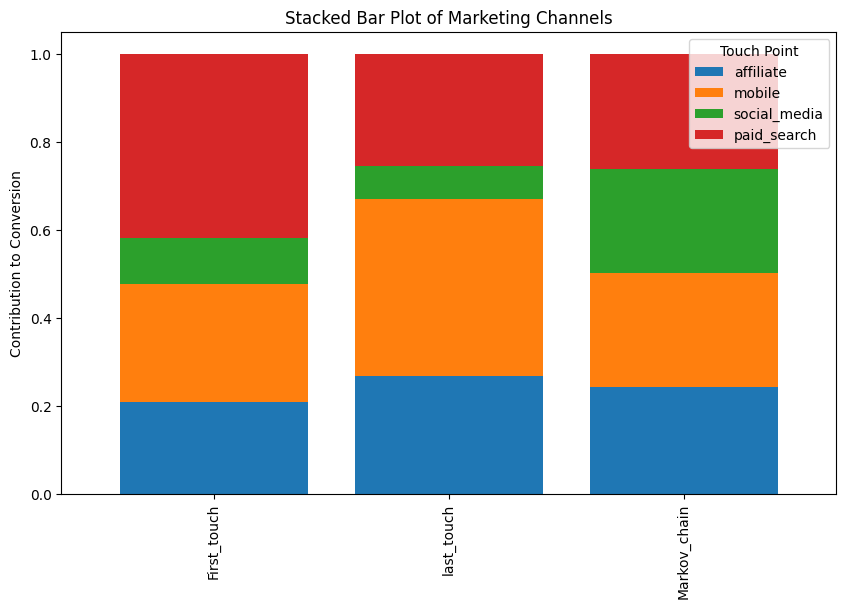

In [211]:


# Create a stacked bar plot
ax = table_summary.plot(kind='bar', stacked=True, figsize=(10, 6),width=0.8)

# Customize the plot
ax.set_title('Stacked Bar Plot of Marketing Channels')
ax.set_ylabel('Contribution to Conversion')
ax.legend(title='Touch Point')

# Show the plot
plt.show()

While first-touch model guides KNC to invest more in paid search and less in social media, last-touch model would suggest strong influence of mobile advertising. Finally, Markov graph approach suggests that the contribution made by all four touchpoints are actually quite evenly distributed.

Which model should KNC choose?

There are two options available for KNC when deciding which model to choose:

KNC should try to make sense of these results, first. Prisha can combine the model-based evidence with her managerial intuition. Given her concerns about the touch-based models, Prisha is advised to make her next budget allocation decisions based on Markov chain model output. At the end of the campaign period, she can assess whether there is a significant improvement in conversion rates.

Alternative approach would be to assess the predictive power of attribution models by using a larger dataset. Research on attribution models demonstrate that Markov chain models provide a fairer allocation of weights to channels and perform better than heuristic (e.g., first-touch and last-touch) methods in predicting conversion rates because they take into account the interplay across touchpoints and sequentiality in a customer journey (Anders et al. 2016).In appendix, we illustrate how predictive performance of these models can be assessed using the current dataset. In our illustration, Markov model performs better than heuristic methods. However, we take those results with a grain of salt because some paths to purchase occur only a few times in the test set, which may make conversion probabilities less reliable.

***What if a particular touchpoint is removed?***

What would have happened to conversion rate when a particular channel was removed from path-to-purchase? To address this question, we will use Shapley value-based approach.

## Shapley value-based approach

This modelling approach allows us to evaluate the relative importance of a customer touchpoint to *conversion*.

Using mobile marketing as an example, we will calculate the **drop** in conversion probability. The scale of the drop will be the importance of mobile marketing in converting customers. Specifically, we will calculate the following:


\begin{equation}
\text { (No.ofconversions/No. ofobservations) - (No.ofconversions } \left.s_{\text {nomocile }} / \text { No. ofobservations } \text { nomoctile }\right)
\end{equation}



The below code chunk searches if each of the paths contains mobile, paid search, affiliate, and social media or not. Then, it generates four indicator variables.

In [213]:
grouped_data.head()

,cleaned_path,user_purchase,null_purchase
0,affiliate>mobile>affiliate>social_media>social...,1,0
1,affiliate>paid_search>affiliate>paid_search>af...,1,0
2,affiliate>paid_search>affiliate>paid_search>mo...,1,0
3,affiliate>paid_search>affiliate>paid_search>so...,1,0
4,affiliate>paid_search>affiliate>paid_search>so...,4,0


In [214]:
grouped_data.columns=['cleaned_path','conversion','non_conversion']

In [215]:
grouped_data.head()

,cleaned_path,conversion,non_conversion
0,affiliate>mobile>affiliate>social_media>social...,1,0
1,affiliate>paid_search>affiliate>paid_search>af...,1,0
2,affiliate>paid_search>affiliate>paid_search>mo...,1,0
3,affiliate>paid_search>affiliate>paid_search>so...,1,0
4,affiliate>paid_search>affiliate>paid_search>so...,4,0


In [217]:
# Search if each of the paths contains mobile, paid search, affiliate, and social media or not, and generate four indicator variables.

# Generate indicator variables for each channel
grouped_data['with_mobile'] = grouped_data['cleaned_path'].str.contains('mobile', case=False)
grouped_data['with_paid_search'] = grouped_data['cleaned_path'].str.contains('paid_search', case=False)
grouped_data['with_affiliate'] = grouped_data['cleaned_path'].str.contains('affiliate', case=False)
grouped_data['with_social_media'] = grouped_data['cleaned_path'].str.contains('social_media', case=False)

# Calculate variables for no_mobile
grouped_data['no_mobile_conversion'] = grouped_data.apply(lambda row: row['conversion'] if not row['with_mobile'] else 0, axis=1)
grouped_data['no_mobile_count'] = grouped_data.apply(lambda row: (row['conversion'] + row['non_conversion']) if not row['with_mobile'] else 0, axis=1)

# Calculate variables for no_paid_search
grouped_data['no_paidsearch_conversion'] = grouped_data.apply(lambda row: row['conversion'] if not row['with_paid_search'] else 0, axis=1)
grouped_data['no_paidsearch_count'] = grouped_data.apply(lambda row: (row['conversion'] + row['non_conversion']) if not row['with_paid_search'] else 0, axis=1)

# Calculate variables for no_affiliate
grouped_data['no_affiliate_conversion'] = grouped_data.apply(lambda row: row['conversion'] if not row['with_affiliate'] else 0, axis=1)
grouped_data['no_affiliate_count'] = grouped_data.apply(lambda row: (row['conversion'] + row['non_conversion']) if not row['with_affiliate'] else 0, axis=1)

# Calculate variables for no_social_media
grouped_data['no_social_media_conversion'] = grouped_data.apply(lambda row: row['conversion'] if not row['with_social_media'] else 0, axis=1)
grouped_data['no_social_media_count'] = grouped_data.apply(lambda row: (row['conversion'] + row['non_conversion']) if not row['with_social_media'] else 0, axis=1)



In [250]:
total_conversions = grouped_data['conversion'].sum()
total_observations = len(data_train)

# Calculate Shapley values for each channel
shapley_mobile = (total_conversions / total_observations) - ((total_conversions - grouped_data['no_mobile_conversion'].sum()) / (total_observations - grouped_data['no_mobile_count'].sum()))
shapley_paidsearch = (total_conversions / total_observations) - ((total_conversions - grouped_data['no_paidsearch_conversion'].sum()) / (total_observations - grouped_data['no_paidsearch_count'].sum()))
shapley_affiliate = (total_conversions / total_observations) - ((total_conversions - grouped_data['no_affiliate_conversion'].sum()) / (total_observations - grouped_data['no_affiliate_count'].sum()))
shapley_socialmedia = (total_conversions / total_observations) - ((total_conversions - grouped_data['no_social_media_conversion'].sum()) / (total_observations - grouped_data['no_social_media_count'].sum()))

print("Shapley Value for Mobile:", shapley_mobile)
print("Shapley Value for Paid Search:", shapley_paidsearch)
print("Shapley Value for Affiliate:", shapley_affiliate)
print("Shapley Value for Social Media:", shapley_socialmedia)

Shapley Value for Mobile: 0.010119047619047694
Shapley Value for Paid Search: 0.007495590828924259
Shapley Value for Affiliate: -0.009609868043602976
Shapley Value for Social Media: 0.012808921036769227


In [275]:
# Convert Shapley values to percentage terms
shapley_total = shapley_mobile + shapley_paidsearch + max(0,shapley_affiliate) + shapley_socialmedia

shapley_mobile_pct = shapley_mobile / shapley_total
shapley_paidsearch_pct = shapley_paidsearch / shapley_total
shapley_affiliate_pct = max(0,shapley_affiliate) / shapley_total #applying max function to convert it to 0 as it's a negative value implying, it worsens the conversion 
shapley_socialmedia_pct = shapley_socialmedia / shapley_total

print("Shapley Value for Mobile (%):", shapley_mobile_pct)
print("Shapley Value for Paid Search (%):", shapley_paidsearch_pct)
print("Shapley Value for Affiliate (%):", shapley_affiliate_pct)
print("Shapley Value for Social Media (%):", shapley_socialmedia_pct)

Shapley Value for Mobile (%): 0.33260564478403204
Shapley Value for Paid Search (%): 0.24637455169187694
Shapley Value for Affiliate (%): 0.0
Shapley Value for Social Media (%): 0.421019803524091


Conclusions

Overall, the marketing group at KNC seems to be rather confident of the following decisions to make:

KNC should analyze and predict consumer conversion by switching from first- and last-touch heuristic approaches to Markov chain model.

Instead of downgrading their emphasis on affiliate and social media advertising, KNC should keep investing in all of the customer touchpoints.

KNC can use the Shapley value-based modelling approach to quantify the potential impact of a channel removal on consumers' purchases. However, removal of a channel (e.g., social media) may result in significant changes in the customer journey. Consumers may be pushed to other touchpoints (e.g. paid search) that might be more costly to the firm. Therefore, findings from Shapley model should always be combined with a careful strategic analysis. For instance, even though the model finds zero contribution for the social media channel, the manager may still want to be present on social media to increase the brand awareness in the market.

These results do not imply causality. To understand the causal impact of a touchpoint on the relevant performance metrics, KNC is suggested to run randomized field experiments.